# Zomato data analysis project

 STEP 1 - Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Desktop/Zomato data .csv")

In [8]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


STEP 2- DATA CLEANING AND DATA PREPROCESSING

* Convert the data type of column - rate

In [32]:
def handleRate(value):
    value =str(value).split("/")
    value = value[0];
    return float(value)
    
df['rate'] = df['rate'].apply(handleRate)
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [10]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


# Q1. What type of resturant do the majority of customers order from ?

In [36]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type Of Resturant')

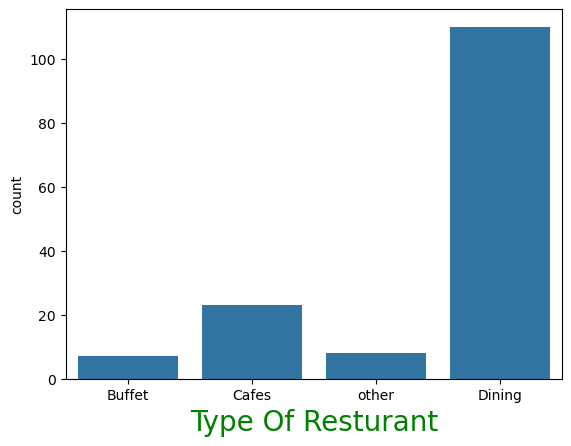

In [38]:
sns.countplot(x= df['listed_in(type)'])
plt.xlabel('Type Of Resturant', c = 'green', size = '20')

# Conclusion 
  # majority of the customers falls in dining category.

# Q2. How many votes has each type of resturant recieved from customers ?

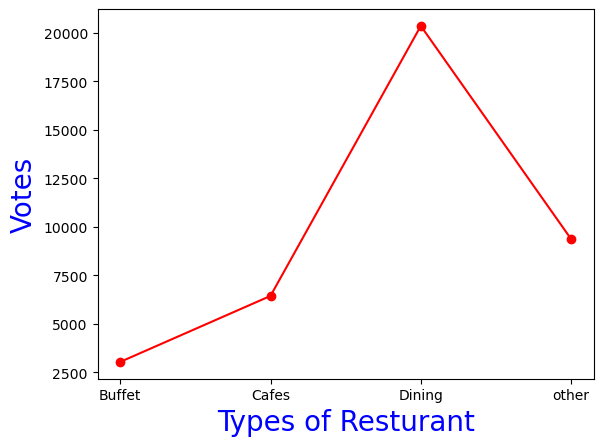

In [40]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = 'red', marker = 'o')
plt.xlabel('Types of Resturant', c = 'blue', size = 20)
plt.ylabel('Votes', c = 'blue', size = 20)
plt.show()

# CONCLUSION 
# Votes has each type of resturant recieved from customers
   * Buffet = 2500,
   * Cafes = 62500, 
   * Dining = 20000, 
   * Other = 8750
# Dining resturants has recieved maximum votes from customers.

# Q3. What are the ratings that the majority of resturants have recived ?

In [42]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


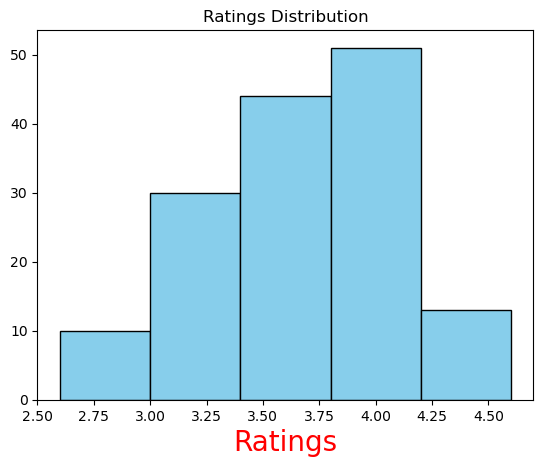

In [76]:
plt.hist(df['rate'], bins = 5, color = 'skyblue', edgecolor = 'black')
plt.title('Ratings Distribution')
plt.xlabel('Ratings', color = 'red', size = 20)
plt.show()

# Conclusion:  Majority Resturants recieved ratings from 3.5 to 4

# Q4. Average order spending by couples

In [46]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


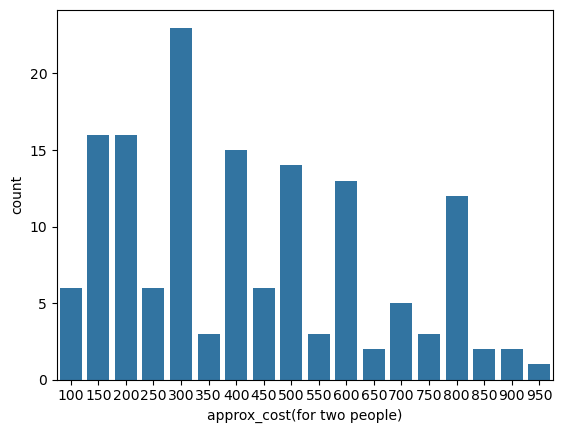

In [64]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x= couple_data)
plt.show()

# Conclusion : majority of couples prefer restaurants with an approximate cost of 300 rupees.

# Q 5. Which mode(online or offline) recieves maximum rating ?

In [44]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


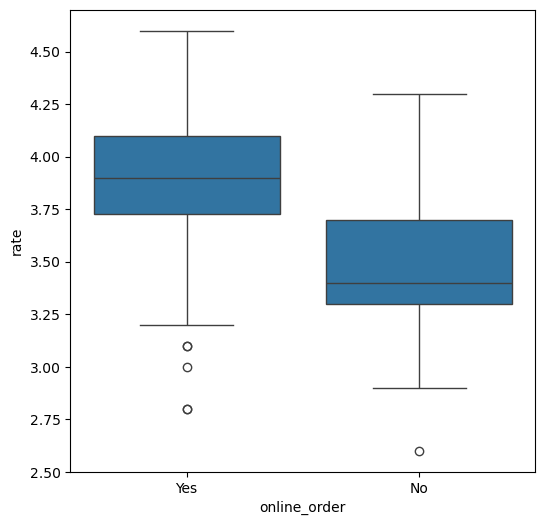

In [83]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y='rate',data = df)
plt.show()

# Conclusion: Offline orders recieves lower rating as compared to online orders

# Q6. Which type of restaurant recieved more online orders, so that Zomato can provides customers with some good offers ?

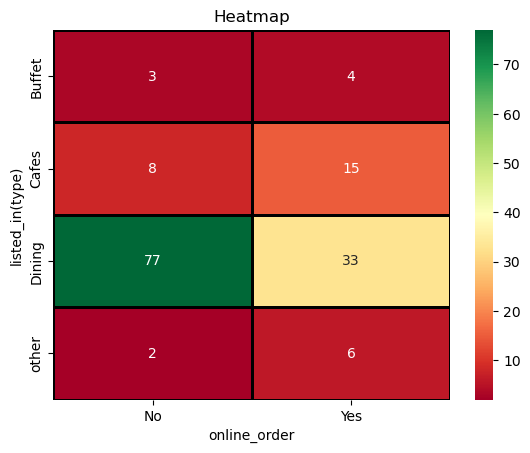

In [100]:
pivot_table = df.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot= True, cmap ='RdYlGn', fmt = 'd', linewidths = 2, linecolor = 'black')
plt.title('Heatmap')
plt.xlabel('online_order')
plt.ylabel('listed_in(type)')
plt.show()

# Conclusion: Dining resturants primarly accepts offline orders, whereas Cafes primarly accepts online orders. This suggests that clients prefer to place orders in person at resturants, but prefer online ordering at cafes.